# Linear Regression

## Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

## Importing the dataset

In [ ]:
dataset = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [ ]:
print(dataset.head())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

## Training the Linear Regression model on the whole dataset

In [ ]:
# Select relevant features and target
features = ['LotArea', 'OverallQual', 'YearBuilt', 'GrLivArea', 'FullBath', 'GarageCars', 'GarageArea', 'YrSold']
target = 'SalePrice'

X = dataset[features]
y = dataset[target]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Create preprocessing pipeline
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])


In [ ]:
# Append linear regression model to preprocessing pipeline
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', LinearRegression())])

# Train the model
model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['LotArea', 'OverallQual', 'YearBuilt', 'GrLivArea', 'FullBath',
       'GarageCars', 'GarageArea', 'YrSold'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index([], dtype='object'))])),
                ('regressor', LinearRegression())])

## Make Predictions


In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error on test data: {mse:.2f}")


Mean Squared Error on test data: 1726999818.45


## Plotting the linear regresion graph

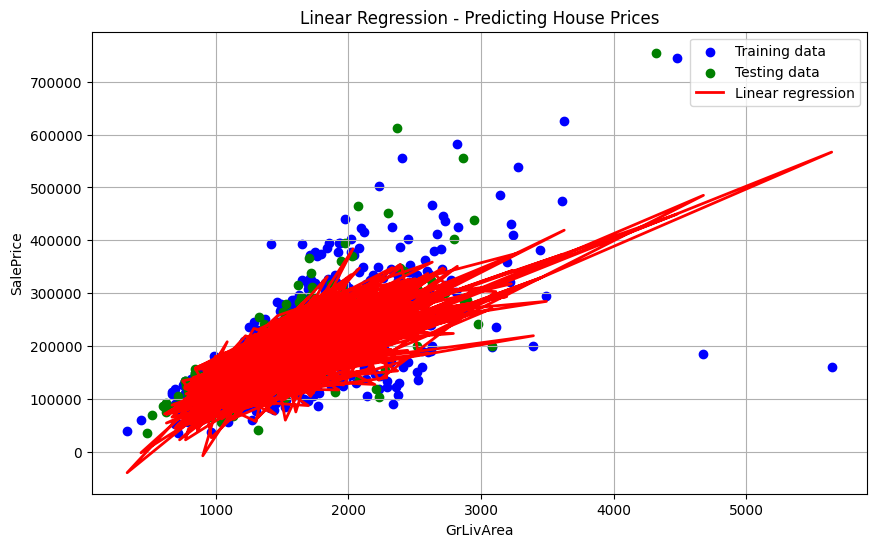

In [ ]:
# Extract the numerical feature for plotting against SalePrice
feature_for_plot = 'GrLivArea'

# Plotting the linear regression line
plt.figure(figsize=(10, 6))
plt.scatter(X_train[feature_for_plot], y_train, color='blue', label='Training data')
plt.scatter(X_test[feature_for_plot], y_test, color='green', label='Testing data')
plt.plot(X_train[feature_for_plot], model.predict(X_train), color='red', linewidth=2, label='Linear regression')
plt.xlabel(feature_for_plot)
plt.ylabel('SalePrice')
plt.title('Linear Regression - Predicting House Prices')
plt.legend()
plt.grid(True)
plt.show()


## Predicting Prices for a new house

In [ ]:
# Example prediction for a new house
new_house = pd.DataFrame([[10000, 8, 2010, 2000, 3, 2, 500, 2023]], columns=features)
predicted_price = model.predict(new_house)

print(f"Predicted price for the new house: ${predicted_price[0]:,.2f}")


Predicted price for the new house: $270,127.25


In [ ]:
import pandas as pd

# Example cases for prediction
cases = [
    {'LotArea': 10000, 'OverallQual': 8, 'YearBuilt': 2010, 'GrLivArea': 2000, 'FullBath': 3, 'GarageCars': 2, 'GarageArea': 500, 'YrSold': 2023},
    {'LotArea': 12000, 'OverallQual': 7, 'YearBuilt': 2005, 'GrLivArea': 1800, 'FullBath': 2, 'GarageCars': 2, 'GarageArea': 480, 'YrSold': 2022},
    {'LotArea': 8000, 'OverallQual': 6, 'YearBuilt': 1995, 'GrLivArea': 1600, 'FullBath': 2, 'GarageCars': 1, 'GarageArea': 400, 'YrSold': 2024},
    {'LotArea': 15000, 'OverallQual': 9, 'YearBuilt': 2015, 'GrLivArea': 2500, 'FullBath': 3, 'GarageCars': 3, 'GarageArea': 600, 'YrSold': 2021}
]

# Convert the cases into a DataFrame
cases_df = pd.DataFrame(cases)

# Predict house prices for each case using the trained model
predicted_prices = model.predict(cases_df)

# Print the predicted prices for each case
for i, price in enumerate(predicted_prices):
    print(f"Predicted price for case {i+1}: ${price:,.2f}")


Predicted price for case 1: $270,127.25
Predicted price for case 2: $241,670.16
Predicted price for case 3: $190,860.63
Predicted price for case 4: $335,808.96


## Finding Accuracy

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Predict house prices for each case using the trained model
predicted_prices = model.predict(cases_df)

# Create a dummy y_test with the same number of samples as predicted_prices
y_test_dummy = np.zeros_like(predicted_prices)  # Creating dummy zeros

# Compute RMSE
rmse = np.sqrt(mean_squared_error(y_test_dummy, predicted_prices))
print(f"Root Mean Squared Error (RMSE) for predicted cases: {rmse:.2f}")



Root Mean Squared Error (RMSE) for predicted cases: 264843.65


In [ ]:
from sklearn.metrics import r2_score

# Predict house prices for test data using the trained model
predicted_prices_test = model.predict(X_test)

# Compute R-squared for test data
r2_test = r2_score(y_test, predicted_prices_test)
accuracy_percentage_test = r2_test * 100
print(f"Accuracy (R-squared) for test data: {accuracy_percentage_test:.2f}%")




Accuracy (R-squared) for test data: 77.48%
